In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_energy = pd.read_csv("energy_dataset.csv")

In [3]:
df_energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [4]:
columns_renamed = {
    'time':'Time', 
    'generation biomass':'Biomass', 
    'generation fossil brown coal/lignite': 'Brown Coal/Lig',
    'generation fossil coal-derived gas': 'Coal Derived Gas', 
    'generation fossil gas' : 'Fossil Gas',
    'generation fossil hard coal': 'Hard Coal', 
    'generation fossil oil': 'Fossil Oil',
    'generation fossil oil shale': "Oil Shale", 
    'generation fossil peat': 'Peat',
    'generation geothermal': 'Geothermal', 
    'generation hydro pumped storage aggregated': 'Hydro PSA',
    'generation hydro pumped storage consumption': 'Hydro PSC',
    'generation hydro run-of-river and poundage': 'Hydro River/Poundage',
    'generation hydro water reservoir' : 'Hydro Reservoir', 
    'generation marine': 'Marine',
    'generation nuclear': 'Nuclear', 
    'generation other': 'Other', 
    'generation other renewable' : 'Other Renewables',
    'generation solar' : 'Solar', 
    'generation waste' : 'Waste', 
    'generation wind offshore': 'Wind Offshore',
    'generation wind onshore': 'Wind Onshore', 
    'forecast solar day ahead': 'Forecast_Solar_Day_Ahead',
    'forecast wind offshore eday ahead': 'Forecast_Wind_Offshore_Eday_Ahead', 
    'forecast wind onshore day ahead': 'Forecast_Wind_Onshore_Eday_Ahead',
    'total load forecast': 'Total_Load_Forecast', 
    'total load actual': 'Total_Load_Actual', 
    'price day ahead': 'Price_Day_Ahead',
    'price actual': 'Price_Actual'
}

In [5]:
df_energy.rename(columns=columns_renamed,inplace=True)
del columns_renamed

In [6]:
DATETIME_FORMAT = "%Y-%m-%d %H:%M:%S%z"
df_energy['Time'] = pd.to_datetime(df_energy['Time'], format=DATETIME_FORMAT ,utc=True)
del DATETIME_FORMAT

In [7]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   Time                               35064 non-null  datetime64[ns, UTC]
 1   Biomass                            35045 non-null  float64            
 2   Brown Coal/Lig                     35046 non-null  float64            
 3   Coal Derived Gas                   35046 non-null  float64            
 4   Fossil Gas                         35046 non-null  float64            
 5   Hard Coal                          35046 non-null  float64            
 6   Fossil Oil                         35045 non-null  float64            
 7   Oil Shale                          35046 non-null  float64            
 8   Peat                               35046 non-null  float64            
 9   Geothermal                         35046 non-null 

In [8]:
df_energy.drop(['Hydro PSA','Forecast_Wind_Offshore_Eday_Ahead'],axis=1,inplace=True)

In [9]:
df_energy.columns

Index(['Time', 'Biomass', 'Brown Coal/Lig', 'Coal Derived Gas', 'Fossil Gas',
       'Hard Coal', 'Fossil Oil', 'Oil Shale', 'Peat', 'Geothermal',
       'Hydro PSC', 'Hydro River/Poundage', 'Hydro Reservoir', 'Marine',
       'Nuclear', 'Other', 'Other Renewables', 'Solar', 'Waste',
       'Wind Offshore', 'Wind Onshore', 'Forecast_Solar_Day_Ahead',
       'Forecast_Wind_Onshore_Eday_Ahead', 'Total_Load_Forecast',
       'Total_Load_Actual', 'Price_Day_Ahead', 'Price_Actual'],
      dtype='object')

In [10]:
data_generated_electricity_MW = df_energy.groupby(df_energy.Time.dt.month)[
    [
        'Biomass', 
        'Brown Coal/Lig', 
        'Fossil Gas',
        'Hard Coal', 
        'Fossil Oil',  
        'Hydro PSC', 
        'Hydro River/Poundage', 
        'Hydro Reservoir',
        'Nuclear', 
        'Other', 
        'Other Renewables', 
        'Solar', 
        'Waste',
        'Wind Onshore'
    ]
].mean()

In [11]:
months = data_generated_electricity_MW.index

In [12]:
sns.set_theme(style="white")
sns.set_context("paper")

In [13]:
my_palette = {
    'Fuchsia': "#FF00FF",
    "Cyan":"#00FFFF",
    'Lime': "#00FF00", 
    #'Yellow': "#FFFF00", 
    'Red': "#FF0000", 
    'Black': "#000000", 
    "Blue": "#0074D9",
    'Gray': "#808080",
    'Pink':"#FFC0CB",
    "Orange":'#FFA500',
    "DarkSeaGreen" : "#8FBC8F",
    "DarkGreen": "#006400",
    "Crimson": "#DC143C",
    #"DarkGoldenRod": "#B8860B" , 
    "Ultra Violet": "#6B5B95",
    #"Emerald" : "#009B77",
    "Aqua Sky": "#7FCDCD"
}

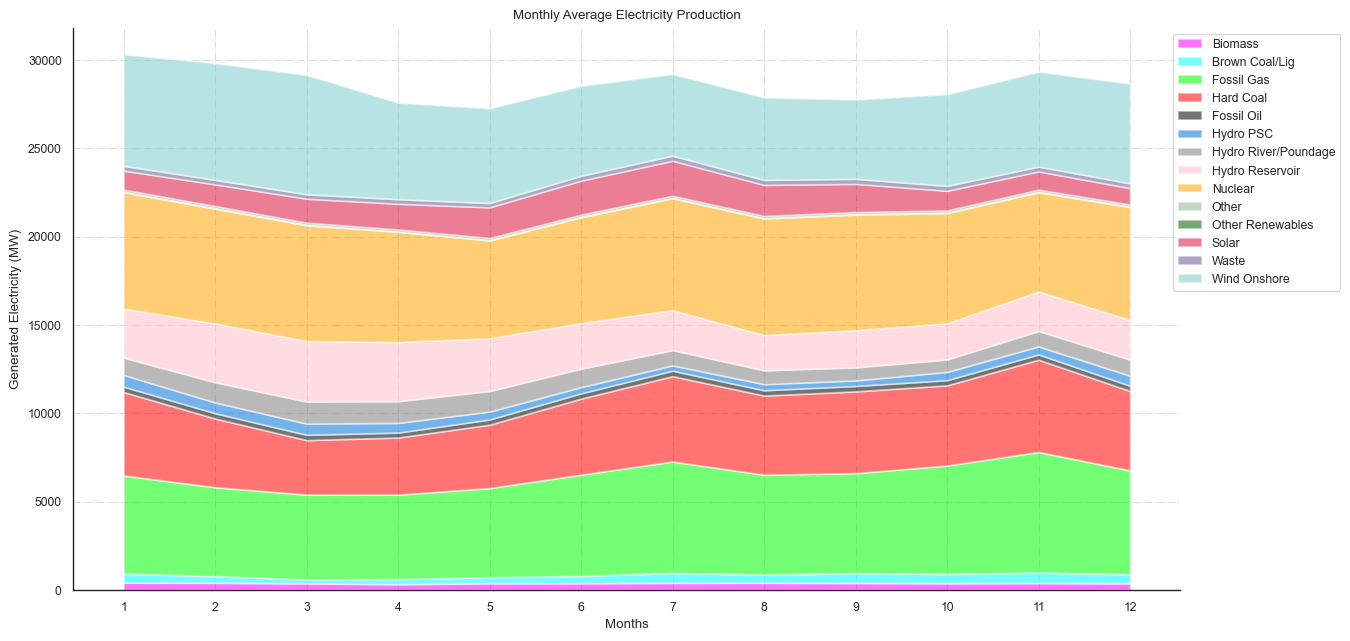

In [14]:
plt.figure(figsize=(13.5,6.5))

plt.stackplot(months,
        data_generated_electricity_MW['Biomass'], 
        data_generated_electricity_MW['Brown Coal/Lig'], 
        data_generated_electricity_MW['Fossil Gas'],
        data_generated_electricity_MW['Hard Coal'], 
        data_generated_electricity_MW['Fossil Oil'],  
        data_generated_electricity_MW['Hydro PSC'], 
        data_generated_electricity_MW['Hydro River/Poundage'], 
        data_generated_electricity_MW['Hydro Reservoir'],
        data_generated_electricity_MW['Nuclear'], 
        data_generated_electricity_MW['Other'], 
        data_generated_electricity_MW['Other Renewables'], 
        data_generated_electricity_MW['Solar'], 
        data_generated_electricity_MW['Waste'],
        data_generated_electricity_MW['Wind Onshore'],
        labels = list(data_generated_electricity_MW.columns),
        alpha=0.55,
        colors=my_palette.values(),
        lw = 1.25,
        edgecolor="w"
    )

plt.xticks(months,months)
plt.title("Monthly Average Electricity Production")
plt.ylabel("Generated Electricity (MW)")
plt.xlabel("Months")


plt.legend(bbox_to_anchor =(1.15, 1))

plt.grid(True,alpha=0.7,ls="-.")
sns.despine()
plt.tight_layout()
plt.show()

In [15]:
solar_data = df_energy.groupby(df_energy["Time"].dt.hour)["Solar"].mean()
solar_forecast = df_energy.groupby(df_energy["Time"].dt.hour)["Forecast_Solar_Day_Ahead"].mean()
time = solar_data.index

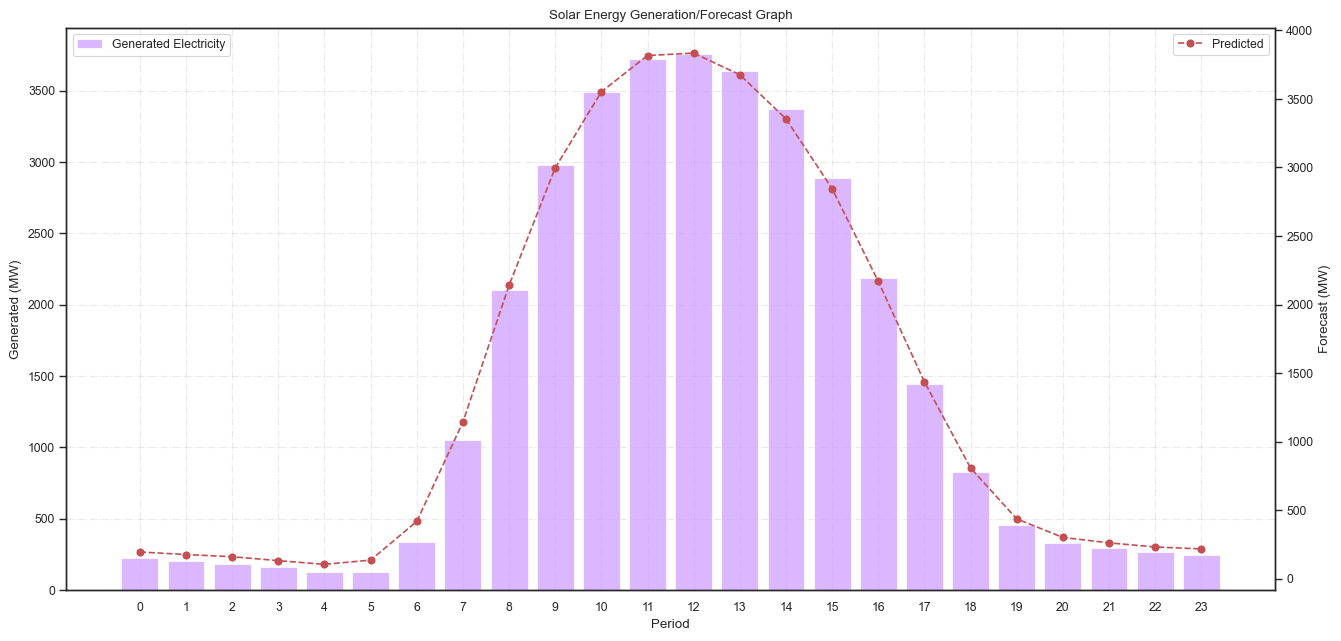

In [16]:
fig, ax1 = plt.subplots(figsize=(13.5,6.5))


ax1.bar(time,solar_data,color="#CC99FF",alpha=0.7,label="Generated Electricity")
ax1.set_xticks(time,time)
ax1.grid(True,alpha=0.4,ls="-.")
ax1.set_xlabel("Period")
ax1.set_ylabel("Generated (MW)")
ax1.legend(loc=2)


ax2 = ax1.twinx()
ax2.plot(time,solar_forecast,"ro--",label="Predicted")
ax2.set_ylabel("Forecast (MW)")
ax2.legend(loc=1)


plt.title("Solar Energy Generation/Forecast Graph")
plt.tight_layout()
plt.show()

In [17]:
data_summer_day = df_energy[df_energy['Time'].dt.strftime('%Y-%m-%d') == '2016-07-07']
data_summer_day = data_summer_day.groupby(data_summer_day.Time.dt.hour)[["Wind Onshore","Solar","Total_Load_Actual"]].sum()
hours = data_summer_day.index


load_without_solar_wind = data_summer_day['Total_Load_Actual'].sum() - (data_summer_day["Wind Onshore"].sum() + data_summer_day["Solar"].sum())
pies = {"Total Loads Other": load_without_solar_wind,
        "Wind Load": data_summer_day["Wind Onshore"].sum(),
        'Solar Load': data_summer_day["Solar"].sum() }

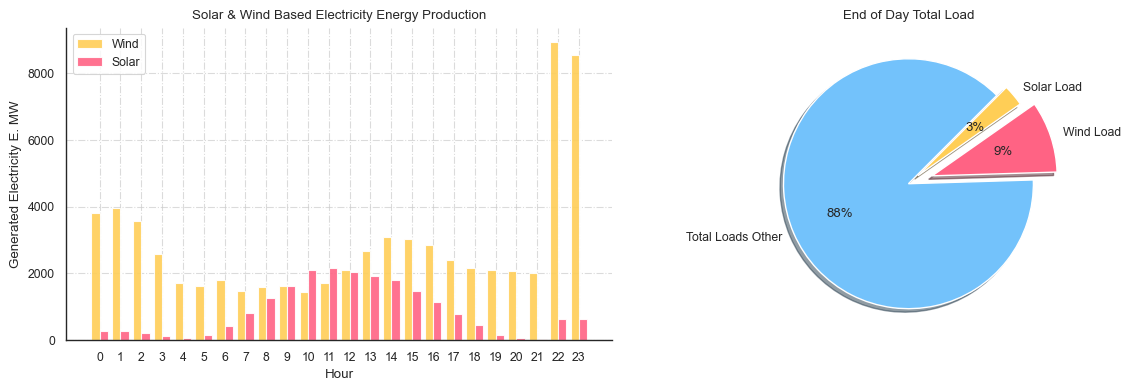

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,4))


ax[0].bar(hours - 0.2,
       data_summer_day["Wind Onshore"],
       label = "Wind",
       color= "#FFCE56",
       alpha=0.9,
       width=0.4
       )
ax[0].set_xticks(hours,hours)

ax[0].bar(hours + 0.2,
        data_summer_day["Solar"], 
        color="#FF6384",
        label = "Solar",
        width=0.4,
        alpha=0.9
        )
ax[0].legend(loc='best')
ax[0].set_title("Solar & Wind Based Electricity Energy Production")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Generated Electricity E. MW")
ax[0].grid(True,alpha=0.7,ls="-.")
sns.despine()

colors = sns.color_palette('pastel')

ax[1].pie(
    pies.values(),
    labels= pies.keys(),
    shadow=True,
    colors = ["#73C2FB","#FF6384","#FFCE56"],
    explode = [0.0,0.2,0.1],
    startangle=45,
    autopct='%.0f%%',
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : "white", 'antialiased': True }
)


ax[1].set_title("End of Day Total Load")
fig.tight_layout()
plt.show()

In [19]:
del data_summer_day
del data_generated_electricity_MW
del hours
del pies
del months

In [24]:
data_load = df_energy[
    (df_energy.Time.dt.strftime("%Y-%m-%d") > '2018-07-01') & 
    (df_energy.Time.dt.strftime("%Y-%m-%d") < '2018-08-01')].groupby(df_energy.Time.dt.date)[
        ["Total_Load_Actual",
         "Total_Load_Forecast"]].mean()

In [21]:
sns.set_theme(style="white",palette='pastel')
sns.set_context("paper")

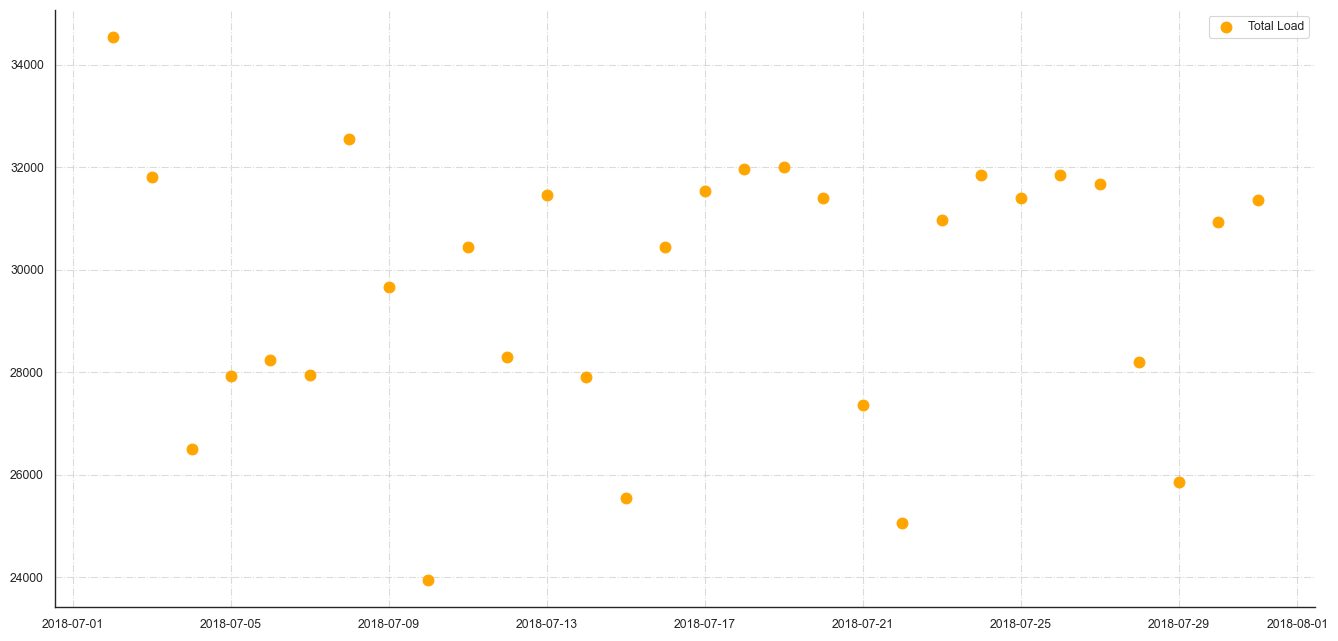

In [23]:
plt.figure(figsize=(13.5,6.5))

plt.scatter(
        data_load.index,
        data_load.Total_Load_Actual,
        s=60,
        c='#FFA500',
        label='Total Load')


#plt.ylim(2*10e3,4*10e3)
plt.legend(loc='best')

plt.grid(True,
         alpha=0.7,
         ls='-.')

plt.tight_layout()

sns.despine()
plt.show()